<a href="https://colab.research.google.com/github/naumkao/ML_Project/blob/main/Neironka_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Построение модели обучения на основе нейронных сетей

In [ ]:
#Загружаем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Библиотека для нормализации датасета
from sklearn.preprocessing import MinMaxScaler
#Библиотека для разбиение датасета на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

#Библиотеки для обучения нейросети
from keras.models import Sequential
from keras.layers import Dense

#Загружаю метрики для оценки качества обучения
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
dataset = pd.read_csv('ebw_data.csv')
dataset.head()

HTTPError: ignored

In [ ]:
#y = dataset[['Depth','Width']].values
#X = dataset.drop(['Depth','Width'], axis=1).values
#dataset_names = ['IW', 'IF', 'VW', 'FP']

In [ ]:
dataset.describe()

,IW,IF,VW,FP,Depth,Width
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,45.666667,141.333333,8.638889,78.333333,1.195556,1.970417
std,1.678363,5.145763,2.061078,21.493530,0.225081,0.279040
min,43.000000,131.000000,4.500000,50.000000,0.800000,1.680000
25%,44.000000,139.000000,8.000000,60.000000,1.080000,1.760000
50%,45.500000,141.000000,9.000000,80.000000,1.200000,1.840000
75%,47.000000,146.000000,10.000000,80.000000,1.290000,2.050000
max,49.000000,150.000000,12.000000,125.000000,1.760000,2.600000


In [ ]:
dataset.corr()

,IW,IF,VW,FP,Depth,Width
IW,1.000000,-0.861073,-0.043430,0.835530,-0.289568,0.434869
IF,-0.861073,1.000000,0.115093,-0.980562,0.376084,-0.510167
VW,-0.043430,0.115093,1.000000,-0.001060,-0.671437,-0.874257
FP,0.835530,-0.980562,-0.001060,1.000000,-0.510748,0.412962
Depth,-0.289568,0.376084,-0.671437,-0.510748,1.000000,0.425391
Width,0.434869,-0.510167,-0.874257,0.412962,0.425391,1.000000


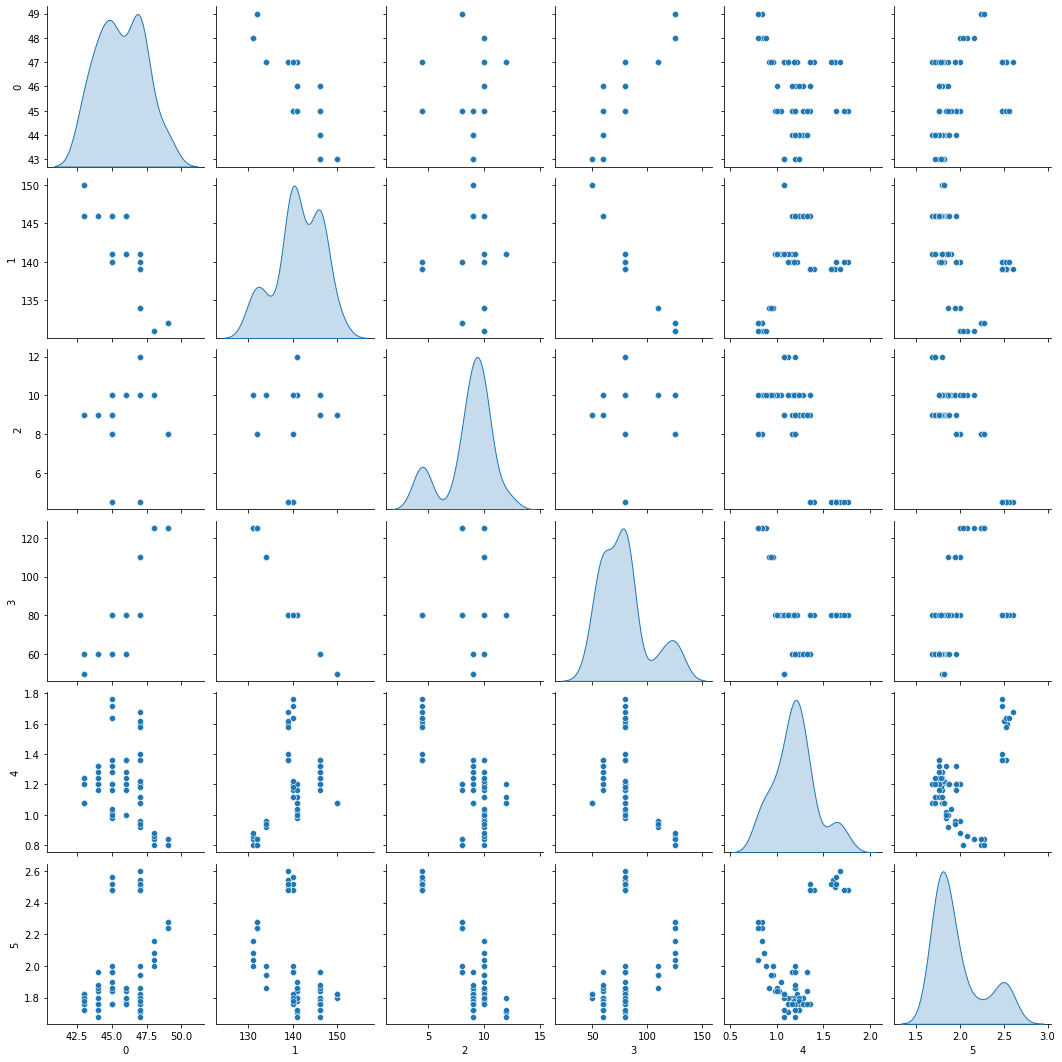

In [ ]:
sns.pairplot(pd.DataFrame(np.column_stack([X, y])), diag_kind='kde')

In [ ]:
#Нормализуем датасет
mms= MinMaxScaler()
dataset_MinMax = mms.fit_transform(np.array(dataset))

In [ ]:
#Записываю целевые переменный в отдельный датасет
y = dataset_MinMax[:,4:6]
X = dataset_MinMax[:,0:4]

In [ ]:
#Разделяю датасет на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, shuffle=True)

In [ ]:
#Создаю функцию с архитектурой нейронной сети
def get_model(n_inputs, n_outputs):
    model = Sequential()
    model.add(Dense(32, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(n_outputs))
    model.compile(loss='mse', optimizer='adam')
    return model

In [ ]:
#Подаем на вход датасет для обучения, указываю целевые переменные y
model = get_model(n_inputs=x_train.shape[1], n_outputs=y_train.shape[1])
#Выводим архитектуру модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Обучение модели
hist = model.fit(x_train, y_train, verbose=0, epochs=80)

In [ ]:
#Записываем результаты обучения в датасет
df = pd.DataFrame(hist.history)

In [ ]:
df

,loss
0,0.213505
1,0.158162
2,0.118357
3,0.091198
4,0.072159
...,...
75,0.003304
76,0.003265
77,0.003265
78,0.003255


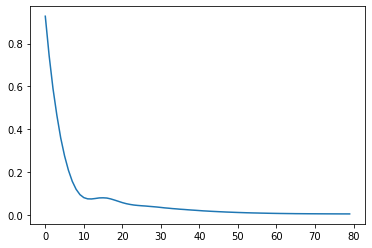

In [ ]:
#График обучения
plt.plot(df)

In [ ]:
#Создаем предсказания 
y_pred = model.predict(X)

3/3 [==============================] - 0s 4ms/step


In [ ]:
mse_Depth = mean_squared_error(y[:,0], y_pred[:,0])
print("Mean squared error (MSE_Depth) on test set: {:.4f}".format(mse_Depth))
mse_Width = mean_squared_error(y[:,1], y_pred[:,1])
print("Mean squared error (MSE_Width) on test set: {:.4f}".format(mse_Width))
R2_Depth = r2_score(y[:,0], y_pred[:,0])
print("R2 score (R2_Depth) on test set: {:.4f}".format(R2_Depth))
R2_Width = r2_score(y[:,1], y_pred[:,1])
print("R2 score (R2_Width) on test set: {:.4f}".format(R2_Width))

Mean squared error (MSE_Depth) on test set: 0.0102
Mean squared error (MSE_Width) on test set: 0.0031
R2 score (R2_Depth) on test set: 0.8124
R2 score (R2_Width) on test set: 0.9662
